## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Data yang digunakan untuk analisis adalah dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [3]:
# change file path if necessary
df = pd.read_csv('botak.csv').sample(1000, random_state=42)

## Descriptive Statistics
### Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1142 to 7212
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           1000 non-null   float64
 1   jenis_kelamin  1000 non-null   object 
 2   pekerjaan      986 non-null    object 
 3   provinsi       1000 non-null   object 
 4   gaji           1000 non-null   float64
 5   is_menikah     1000 non-null   int64  
 6   is_keturunan   997 non-null    float64
 7   berat          1000 non-null   float64
 8   tinggi         1000 non-null   float64
 9   sampo          1000 non-null   object 
 10  is_merokok     1000 non-null   int64  
 11  pendidikan     1000 non-null   object 
 12  botak_prob     1000 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 109.4+ KB


Kita dapat melihat bahwa:
* Dataframe memiliki total 1000 baris dan 13 kolom
* Dataframe masih memiliki *null* values di kolom `pekerjaan` dan `is_keturunan`
* Target klasifikasi sepertinya adalah kolom `botak_prob` dengan tipe data `float64`
* Berarti sisanya adalah *feature*

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [4]:
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']
nums = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'botak_prob']

Tentu saja menyimpan nama kolom berdasarkan tipe *numeric* dan *categorical* seperti di atas tidak wajib, tapi ini lumayan akan memudahkan beberapa proses ke depannya.

### Sampling untuk memahami data dengan `df.sample()`

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [6]:
df.sample(10)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
4959,32.0,Perempuan,Pegawai swasta,Pontianak,1.375421e+07,0,1.0,56.201309,159.761818,Pantone,0,SMP,0.420646
2304,31.0,Perempuan,PNS,Semarang,8.259430e+06,0,1.0,61.260966,158.584715,Moonsilk,0,S1,0.538522
7541,43.0,Laki-laki,Pegawai swasta,Jakarta,6.838204e+06,0,0.0,52.258463,161.772535,Shoulder & Head,1,S3,0.402677
7660,44.0,Laki-laki,Pengangguran,Mataram,4.251980e+06,0,0.0,45.914044,148.210249,Deadbuoy,1,SMA,0.728229
48,33.0,Laki-laki,Freelance,Mamuju,7.895492e+06,0,0.0,50.739755,151.394437,Moonsilk,1,S1,0.263791
6501,42.0,Laki-laki,Pegawai swasta,Ambon,1.257573e+07,0,0.0,46.153546,154.932552,Pantone,1,S1,0.421174
7096,50.0,Perempuan,Pengangguran,Banda Lampung,8.199908e+06,0,0.0,44.964737,163.379161,Merpati,0,S1,0.639160
5382,40.0,Perempuan,PNS,Padang,4.757562e+06,0,0.0,61.460162,158.662128,Moonsilk,1,S3,0.353719
1803,57.0,Laki-laki,Pegawai swasta,Ambon,1.357200e+07,0,0.0,47.853799,154.665995,Pantone,1,S1,0.550949
3187,40.0,Perempuan,PNS,Pekanbaru,7.032246e+06,0,0.0,43.182935,148.584670,Moonsilk,0,S1,0.231343


Beberapa pengamatan:
* Target kita, `botak_prob` benar bertipe float dengan *range* 0-1, dimana 1 melambangkan kemungkinan 100%

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [9]:
df[nums].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,1000.000000,1.000000e+03,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.517000,9.338530e+06,0.035000,0.179539,55.960354,157.308522,0.485000,0.384868
std,10.031667,4.816192e+06,0.183872,0.383995,9.441493,6.550181,0.500025,0.193882
min,4.000000,1.990399e+06,0.000000,0.000000,41.754150,138.487317,0.000000,-0.115700
25%,33.000000,5.985189e+06,0.000000,0.000000,49.723461,152.782408,0.000000,0.241132
50%,39.000000,8.082501e+06,0.000000,0.000000,53.780701,156.979853,0.000000,0.365464
75%,46.000000,1.162239e+07,0.000000,0.000000,59.645683,161.242447,1.000000,0.508360
max,72.000000,3.713150e+07,1.000000,1.000000,128.643924,193.484937,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `umur` dan `gaji` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Ada baris yang memiliki probability `botak_prob` minus. Baris ini harus **dihilangkan** di tahap pre-processing nanti

In [10]:
df[df['botak_prob']<0].shape

(7, 13)

In [11]:
df[cats].describe()

,jenis_kelamin,pekerjaan,sampo,pendidikan,provinsi
count,1000,986,1000,1000,1000
unique,2,4,5,6,34
top,Laki-laki,Pegawai swasta,Merpati,S1,Mataram
freq,654,403,225,565,44


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah Laki-laki (Top kolom `jenis_kelamin` adalah `Laki-laki` dengan frekuensi 655)
* Kolom `provinsi` memiliki jumlah nilai unik yang banyak;ada **kemungkinan tidak terlalu berguna** untuk klasifikasi
* Sebaran nilai di kolom `jenis_kelamin`, `provinsi` dan `sampo` terlihat merata, sedangkan `pekerjaan` dan `pendidikan` terlihat didominasi nilai tertentu

### Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom *categorical* di atas dengan value counting

In [17]:
for col in cats:
    print(f"Value count kolom {col}:")
    print(df[col].value_counts())
    print()

Value count kolom jenis_kelamin:
Laki-laki    654
Perempuan    346
Name: jenis_kelamin, dtype: int64

Value count kolom pekerjaan:
Pegawai swasta    403
PNS               389
Freelance         159
Pengangguran       35
Name: pekerjaan, dtype: int64

Value count kolom sampo:
Merpati            225
Pantone            210
Moonsilk           198
Deadbuoy           189
Shoulder & Head    178
Name: sampo, dtype: int64

Value count kolom pendidikan:
S1     565
SMA    248
S2      76
SMP     71
SD      24
S3      16
Name: pendidikan, dtype: int64

Value count kolom provinsi:
Mataram           44
Manokwari         42
Semarang          42
Tanjungselor      39
Jambi             36
Pekanbaru         35
Medan             34
Manado            34
Ambon             32
Mamuju            32
Palangkaraya      31
Jakarta           30
Gorontalo         30
Banjarmasin       30
Sofifi            29
Padang            28
Banda Lampung     28
Kupang            28
Serang            28
Banda Aceh        28
Samarin

Seperti yang bisa dilihat, pengamatan kita dari `df.describe()` tadi terbukti benar.

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

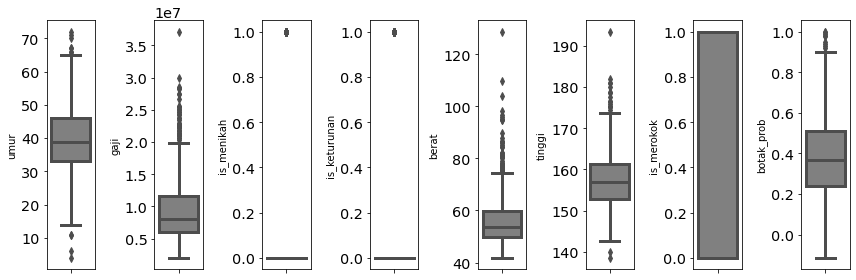

In [15]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `gaji` dan `berat`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `gaji`, `berat`, `tinggi`

### Dist plots

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7052/2389822063.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_7052/2389822063.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py

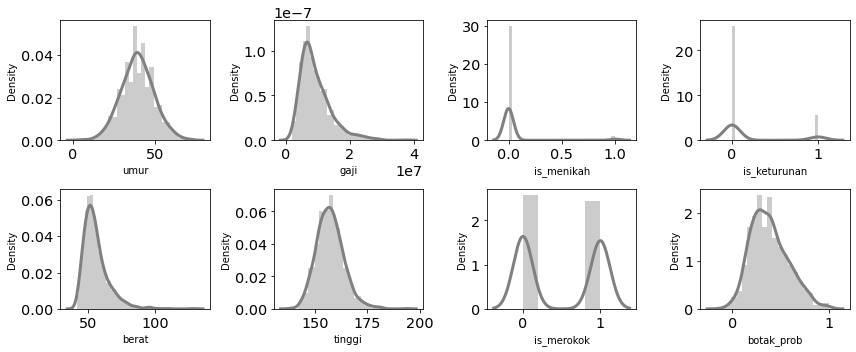

In [21]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `gaji`, `berat`, dan `tinggi` sedikit *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja

### Count plot (categorical)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

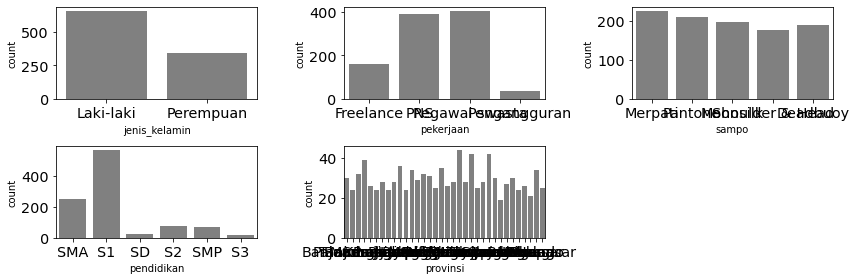

In [22]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='gray', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `pendidikan` dan `pekerjaan` didominasi 1-2 value.


## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

In [ ]:
df.corr()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
umur,1.000000,-0.051310,0.436266,0.000896,-0.015623,0.030225,0.024397,0.339214
gaji,-0.051310,1.000000,-0.030682,0.027093,0.002633,-0.002288,0.034678,0.070522
is_menikah,0.436266,-0.030682,1.000000,0.038568,0.039649,0.083794,0.011160,0.239355
is_keturunan,0.000896,0.027093,0.038568,1.000000,0.063689,0.020268,0.025744,0.622825
berat,-0.015623,0.002633,0.039649,0.063689,1.000000,0.640597,0.056122,0.030708
tinggi,0.030225,-0.002288,0.083794,0.020268,0.640597,1.000000,0.006473,0.036609
is_merokok,0.024397,0.034678,0.011160,0.025744,0.056122,0.006473,1.000000,0.306522
botak_prob,0.339214,0.070522,0.239355,0.622825,0.030708,0.036609,0.306522,1.000000


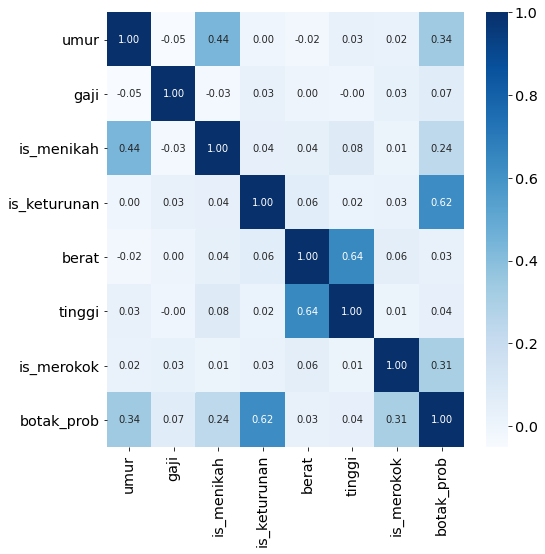

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `botak_prob` memiliki korelasi positif lemah dengan `umur`, `is_menikah`, dan `is_merokok`
* Ia juga memiliki korelasi positif kuat dengan `is_keturunan`
* `tinggi` juga memiliki korelasi positif kuat dengan `berat`. Ada kemungkinan kedua *feature* ini redundan
* `is_menikah` memiliki korelasi dengan `umur`, namun korelasi ini lemah

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan yang major
* Namun masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan
* Dari Heatmap: ada feature yang korelasinya tinggi satu sama lain (berat/tinggi) mungkin cuma akan dipakai satu